# Retail Analysis with Walmart Data#

## Done by Sonali Bapte ##

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #pyplot used when we want to plot nos
from matplotlib import style
%matplotlib inline  
import seaborn as sns

In [3]:
Walmart_data=pd.read_csv('Walmart_Store_sales.csv')
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
Walmart_data.shape

(6435, 8)

In [5]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# Which store has maximum sales

In [6]:
Max_sale=Walmart_data[['Store','Weekly_Sales']]
Max_sale


,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68
...,...,...
6430,45,713173.95
6431,45,733455.07
6432,45,734464.36
6433,45,718125.53


In [7]:
Max_sale=Max_sale.groupby('Store').Weekly_Sales.agg('sum').sort_values(ascending=False)
Max_sale
# Store no 20 has the maximum Sales

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
10    2.716177e+08
27    2.538559e+08
6     2.237561e+08
1     2.224028e+08
39    2.074455e+08
19    2.066349e+08
31    1.996139e+08
23    1.987506e+08
24    1.940160e+08
11    1.939628e+08
28    1.892637e+08
41    1.813419e+08
32    1.668192e+08
18    1.551147e+08
22    1.470756e+08
12    1.442872e+08
26    1.434164e+08
34    1.382498e+08
40    1.378703e+08
35    1.315207e+08
8     1.299512e+08
17    1.277821e+08
45    1.123953e+08
21    1.081179e+08
25    1.010612e+08
43    9.056544e+07
15    8.913368e+07
7     8.159828e+07
42    7.956575e+07
9     7.778922e+07
29    7.714155e+07
16    7.425243e+07
37    7.420274e+07
30    6.271689e+07
3     5.758674e+07
38    5.515963e+07
36    5.341221e+07
5     4.547569e+07
44    4.329309e+07
33    3.716022e+07
Name: Weekly_Sales, dtype: float64

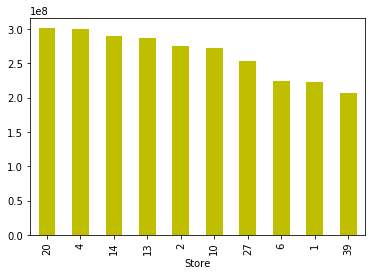

In [8]:
Max_sale[:10].plot(kind='bar',color='y') # Top 10 Stores with the maximum Sales

# Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

In [12]:
Max_std=Walmart_data[['Store','Weekly_Sales']]
Max_std

,Store,Weekly_Sales
0,1,1643690.90
1,1,1641957.44
2,1,1611968.17
3,1,1409727.59
4,1,1554806.68
...,...,...
6430,45,713173.95
6431,45,733455.07
6432,45,734464.36
6433,45,718125.53


In [10]:
Max_std=Max_std.groupby('Store').Weekly_Sales.agg('std').sort_values(ascending=False)
Max_std
# Store no. 14 has the maximum Standard Deviation 

Store
14    317569.949476
10    302262.062504
20    275900.562742
4     266201.442297
13    265506.995776
23    249788.038068
27    239930.135688
2     237683.694682
39    217466.454833
6     212525.855862
35    211243.457791
19    191722.638730
41    187907.162766
28    181758.967539
18    176641.510839
24    167745.677567
11    165833.887863
22    161251.350631
1     155980.767761
12    139166.871880
32    138017.252087
45    130168.526635
21    128752.812853
31    125855.942933
15    120538.652043
40    119002.112858
25    112976.788600
7     112585.469220
17    112162.936087
26    110431.288141
8     106280.829881
34    104630.164676
29     99120.136596
16     85769.680133
9      69028.666585
36     60725.173579
42     50262.925530
3      46319.631557
38     42768.169450
43     40598.413260
5      37737.965745
44     24762.832015
33     24132.927322
30     22809.665590
37     21837.461190
Name: Weekly_Sales, dtype: float64

# find out the coefficient of mean to standard deviation

In [21]:
mean_value = Walmart_data.Weekly_Sales.mean()
std_value = Walmart_data.Weekly_Sales.std()

coefficient_1 = std_value/mean_value
coefficient = mean_value/std_value

round(coefficient, 2)

1.86

# Which store/s has good quarterly growth rate in Q3’2012

In [160]:
Walmart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [162]:
Walmart_data['Date']=pd.to_datetime(Walmart_data['Date'],format= "%d-%m-%Y")
Walmart_data['Date'].dtypes
#df['date_col'] =  pd.to_datetime(df['date_col'], format='%d/%m/%Y')

dtype('<M8[ns]')

In [163]:
Walmart_data['Quarterly']=Walmart_data['Date'].dt.to_period('Q')
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarterly
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q1
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q1
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q1


In [164]:
Growth_data=Walmart_data[['Store','Weekly_Sales','Quarterly']]
Growth_data.head()

,Store,Weekly_Sales,Quarterly
0,1,1643690.90,2010Q1
1,1,1641957.44,2010Q1
2,1,1611968.17,2010Q1
3,1,1409727.59,2010Q1
4,1,1554806.68,2010Q1


In [165]:
Growth_data=Growth_data.loc[Growth_data['Quarterly']=='2012Q3']
Growth_data.head()

,Store,Weekly_Sales,Quarterly
126,1,1769854.16,2012Q3
127,1,1527014.04,2012Q3
128,1,1497954.76,2012Q3
129,1,1439123.71,2012Q3
130,1,1631135.79,2012Q3


In [166]:
Growth_data=Growth_data.groupby('Store').Weekly_Sales.agg('sum').sort_values(ascending=False)
Growth_data
# Store No. 4,20,13,2 has the has good quarterly growth rate in Q3’2012.

Store
4     27796792.46
20    26891526.98
13    26421259.30
2     24303354.86
10    23037258.76
27    22307711.41
14    21187560.65
39    20715116.23
1     20253947.78
6     20167312.24
23    18641489.15
19    18203554.85
41    18093844.01
24    17976377.72
31    17806714.45
11    17516081.44
28    16080704.97
32    15396528.95
26    13675691.91
18    13489765.27
40    12873195.37
22    12845139.71
12    12536324.37
34    12485995.94
17    12459453.05
8     11748952.70
35    11322421.12
45     9581268.38
25     9109081.84
21     9027599.32
7      8262787.39
43     8000572.16
15     7612081.03
42     7296759.34
16     7121541.64
9      7022149.56
37     6728068.24
29     6671234.14
38     5605482.38
30     5594701.86
3      5298005.47
44     4411251.16
5      4163790.99
36     3831691.64
33     3433620.36
Name: Weekly_Sales, dtype: float64

# Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


In [135]:
Holiday_data= Walmart_data[['Weekly_Sales','Date','Holiday_Flag']]
Holiday_data.head()

,Weekly_Sales,Date,Holiday_Flag
0,1643690.90,05-02-2010,0
1,1641957.44,12-02-2010,1
2,1611968.17,19-02-2010,0
3,1409727.59,26-02-2010,0
4,1554806.68,05-03-2010,0


In [136]:
Non_holiday_sales=Holiday_data.loc[Holiday_data['Holiday_Flag']==0]
Non_holiday_sales.head()

,Weekly_Sales,Date,Holiday_Flag
0,1643690.90,05-02-2010,0
2,1611968.17,19-02-2010,0
3,1409727.59,26-02-2010,0
4,1554806.68,05-03-2010,0
5,1439541.59,12-03-2010,0


In [147]:
# Mean sales for non-holiday season for all stores
mean_non_season_non_holiday_sales = Walmart_data[Walmart_data.Holiday_Flag == 0].agg({'Weekly_Sales': 'mean'})
mean_non_season_non_holiday_sales

Weekly_Sales    1.041256e+06
dtype: float64

In [148]:
holiday_sales=Holiday_data.loc[Holiday_data['Holiday_Flag']==1]
holiday_sales.head()

,Weekly_Sales,Date,Holiday_Flag
1,1641957.44,12-02-2010,1
31,1507460.69,10-09-2010,1
42,1955624.11,26-11-2010,1
47,1367320.01,31-12-2010,1
53,1649614.93,11-02-2011,1


In [150]:
# Function to find holidays which have higher sales than the mean sales
def more_sales_check(x):
    if x > mean_non_season_non_holiday_sales[0]:
        return True
    else:
        return False
    

In [153]:
 #Get the holiday weeks which have higher sales than the non-holiday weeks
holidays_week_of_higher_sales = Walmart_data[Walmart_data.Holiday_Flag == 1].loc[Walmart_data.Weekly_Sales.apply(more_sales_check)]
holidays_week_of_higher_sales


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
5819,41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
5825,41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
5855,41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432
6334,45,26-11-2010,1182500.16,1,46.15,3.039,182.783277,8.724


In [154]:
holidays_week_of_higher_sales.set_index('Store', inplace=True)

In [155]:
holidays_week_of_higher_sales

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,,,,,,,
1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787
1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838
1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838
1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...
41,30-12-2011,1264014.16,1,34.12,3.119,196.358610,6.759
41,10-02-2012,1238844.56,1,22.00,3.103,196.919506,6.589
41,07-09-2012,1392143.82,1,67.41,3.596,198.095048,6.432


In [157]:
holidays_week_of_higher_sales['Date']

Store
1     12-02-2010
1     10-09-2010
1     26-11-2010
1     31-12-2010
1     11-02-2011
         ...    
41    30-12-2011
41    10-02-2012
41    07-09-2012
45    26-11-2010
45    25-11-2011
Name: Date, Length: 220, dtype: object

In [158]:
# Above list of 220 have weekely sales higher then average sales of non holiday season.

# Provide monthly and semester view of sales in unit and give insights 

In [169]:
Walmart_data['Days'] = Walmart_data.Date.apply(lambda x: x.day)
Walmart_data['Month']=Walmart_data.Date.apply(lambda x: x.month)
Walmart_data['Year']=Walmart_data.Date.apply(lambda x:x.year)

In [170]:
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Quarterly,Days,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010Q1,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010Q1,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010Q1,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010Q1,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010Q1,5,3,2010


In [173]:
monthly_sales=Walmart_data.groupby('Month').agg({'Weekly_Sales': 'sum'})
monthly_sales

,Weekly_Sales
Month,
1,3.325984e+08
2,5.687279e+08
3,5.927859e+08
4,6.468598e+08
5,5.571256e+08
6,6.226299e+08
7,6.500010e+08
8,6.130902e+08
9,5.787612e+08


In [175]:
daily_sales=Walmart_data.groupby('Days').agg({'Weekly_Sales': 'sum'})
daily_sales

,Weekly_Sales
Days,
1,1.815590e+08
2,2.409695e+08
3,2.394468e+08
4,2.391020e+08
5,2.379863e+08
6,2.447777e+08
7,1.868208e+08
8,1.885009e+08
9,2.450696e+08


In [176]:
yearly_sales=Walmart_data.groupby('Year').agg({'Weekly_Sales': 'sum'})
yearly_sales

,Weekly_Sales
Year,
2010,2.288886e+09
2011,2.448200e+09
2012,2.000133e+09


# Statistical Model
For Store 1 – Build  prediction models to forecast demand

In [22]:
Walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [23]:
Store1_data=Walmart_data.loc[Walmart_data['Store']==1]
Store1_data.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [24]:
Store1_data['Date_sequence']=Store1_data['Date'].index+1
Store1_data

C:\Users\sonali\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_sequence
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,3
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5
...,...,...,...,...,...,...,...,...,...
138,1,28-09-2012,1437059.26,0,76.08,3.666,222.981658,6.908,139
139,1,05-10-2012,1670785.97,0,68.55,3.617,223.181477,6.573,140
140,1,12-10-2012,1573072.81,0,62.99,3.601,223.381296,6.573,141
141,1,19-10-2012,1508068.77,0,67.97,3.594,223.425723,6.573,142


In [115]:
model_data=Store1_data[['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Date_sequence']]
model_data.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_sequence
0,1643690.90,0,42.31,2.572,211.096358,8.106,1
1,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1611968.17,0,39.93,2.514,211.289143,8.106,3
3,1409727.59,0,46.63,2.561,211.319643,8.106,4
4,1554806.68,0,46.50,2.625,211.350143,8.106,5


In [116]:
X_features=model_data[['Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment','Date_sequence']]
X_features.head()

,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Date_sequence
0,0,42.31,2.572,211.096358,8.106,1
1,1,38.51,2.548,211.242170,8.106,2
2,0,39.93,2.514,211.289143,8.106,3
3,0,46.63,2.561,211.319643,8.106,4
4,0,46.50,2.625,211.350143,8.106,5


In [117]:
Y_target=model_data['Weekly_Sales']
Y_target.head()

0    1643690.90
1    1641957.44
2    1611968.17
3    1409727.59
4    1554806.68
Name: Weekly_Sales, dtype: float64

In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, Y_target, test_size=0.2, random_state=0)

In [119]:
# Print shapes of the training and testing data sets
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(114, 6) (29, 6) (114,) (29,)


In [120]:
from sklearn.linear_model import LinearRegression
linReg=LinearRegression()

In [121]:
# fit the training sets into the model
linReg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
#Evaluate the accuracy of your model
y_ped=linReg.predict(X_test)
y_ped

array([1523398.33798863, 1569361.04566157, 1466922.47099673,
       1523533.52588993, 1474202.8964967 , 1541424.69181186,
       1594649.56566061, 1550861.79746758, 1545414.34649196,
       1612841.26385669, 1686425.54896287, 1565488.86625669,
       1494459.59659166, 1656135.83047453, 1567136.59891708,
       1483687.81341536, 1542857.94470332, 1570123.63543488,
       1577554.67919588, 1473618.59977259, 1503327.09926309,
       1562282.79866004, 1525965.73453676, 1471744.39980894,
       1505795.00961908, 1480618.93144289, 1560214.46111589,
       1616492.65326858, 1530850.61475983])

In [123]:
#To retrieve the intercept:
print(linReg.intercept_)
#For retrieving the slope:
print(linReg.coef_)

-2605478.599088698
[ 67173.01667428  -1534.6438032  -43553.39817526  17020.39157976
  92826.08390171     98.83128006]


In [124]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_ped})
df

,Actual,Predicted
45,1891034.93,1.523398e+06
118,1611096.05,1.569361e+06
16,1432069.95,1.466922e+06
56,1636263.41,1.523534e+06
22,1546074.18,1.474203e+06
7,1404429.92,1.541425e+06
108,1688420.76,1.594650e+06
134,1582083.40,1.550862e+06
130,1631135.79,1.545414e+06
101,1459601.17,1.612841e+06


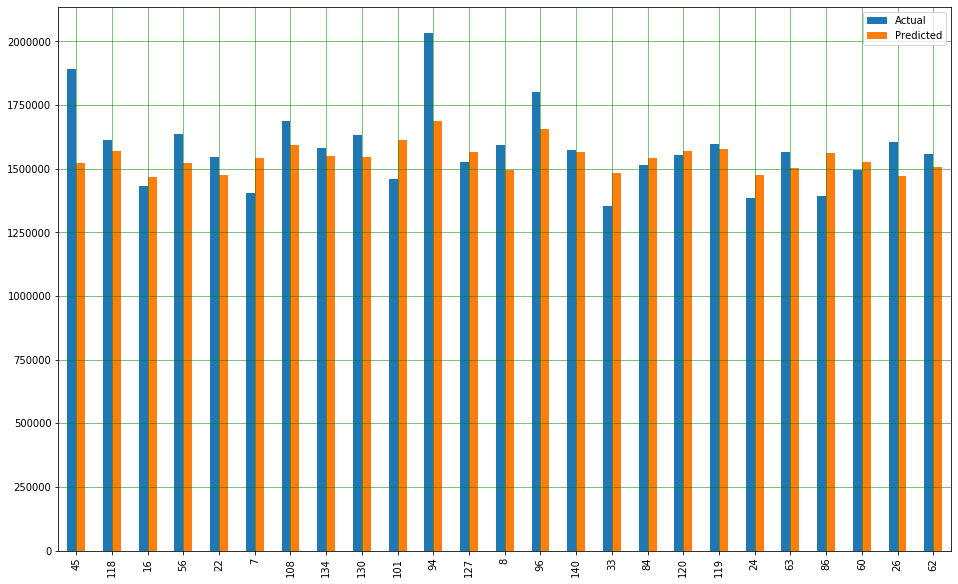

In [125]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [126]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_ped))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_ped))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_ped)))

Mean Absolute Error: 112128.00001267687
Mean Squared Error: 21781646253.03642
Root Mean Squared Error: 147586.06388489538


In [127]:
#Evaluate the accuracy of your model
#y_ped=logreg.predict(X_test)
#from sklearn import metrics
print(metrics.accuracy_score(y_test,y_ped))
# logistic regression model gives 34% accuracy

ValueError: continuous is not supported

In [100]:
import statsmodels.api as sm
X = X_test
y = y_ped
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.313e+26
Date:                Thu, 11 Jun 2020   Prob (F-statistic):          1.31e-285
Time:                        17:28:39   Log-Likelihood:                 513.19
No. Observations:                  29   AIC:                            -1012.
Df Residuals:                      22   BIC:                            -1003.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.605e+06   3.15e-07  -8.28e+12

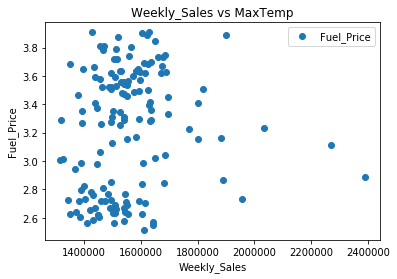

In [42]:
model_data.plot(x='Weekly_Sales', y='Fuel_Price', style='o')  
plt.title('Weekly_Sales vs Fuel_Price')  
plt.xlabel('Weekly_Sales')  
plt.ylabel('Fuel_Price')  
plt.show()

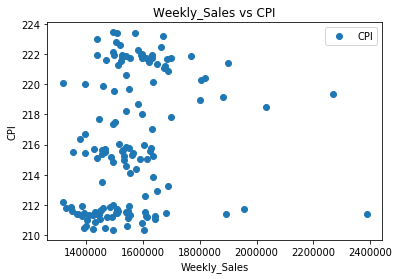

In [43]:
model_data.plot(x='Weekly_Sales', y='CPI', style='o')  
plt.title('Weekly_Sales vs CPI')  
plt.xlabel('Weekly_Sales')  
plt.ylabel('CPI')   
plt.show()

Text(0, 0.5, 'Unemployment')

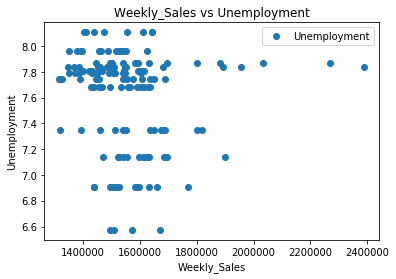

In [98]:
model_data.plot(x='Weekly_Sales', y='Unemployment', style='o')
plt.title('Weekly_Sales vs Unemployment')  
plt.xlabel('Weekly_Sales')  
plt.ylabel('Unemployment')  

Text(0, 0.5, 'Temperature')

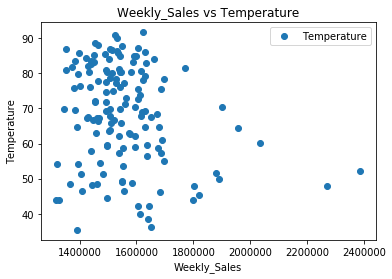

In [46]:
model_data.plot(x='Weekly_Sales', y='Temperature', style='o')
plt.title('Weekly_Sales vs Temperature')  
plt.xlabel('Weekly_Sales')  
plt.ylabel('Temperature') 

In [102]:
X = np.column_stack((model_data['CPI'], model_data['Unemployment'], model_data['Fuel_Price'],model_data['Holiday_Flag'],model_data['Temperature']))
y = model_data['Weekly_Sales']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     4.815
Date:                Thu, 11 Jun 2020   Prob (F-statistic):           0.000436
Time:                        17:33:23   Log-Likelihood:                -1900.8
No. Observations:                 143   AIC:                             3814.
Df Residuals:                     137   BIC:                             3831.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.428e+06   1.75e+06     -1.385      0.1

In [ ]:
# from the above output we can conclude that least p value is for CPI and then for tempreture which is leass than 0.05 
# Hence  these two variables are more significant while features like unemployment, fuel price and holiday flag 
# are not sognificant for predicting Weekly Sales  

## Thank You 